# T5 - IIC2613 | Inteligencia Artificial
## Procesamiento de Lenguaje Natural
#### Manuel Espinoza Q.

# Clasificación de Emails de Spam usando NLP

## Introducción

El Procesamiento de Lenguaje Natural es una subdisciplina de la inteligencia artificial que se enfoca en la interacción entre los computadores y las personas a través del lenguaje natural. Una de las tareas más comunes y útiles en NLP es la clasificación de texto, que involucra asignar categorías predefinidas a fragmentos de texto.

En este proyecto, se abordará la tarea de **clasificación de emails de spam**. El objetivo es desarrollar un modelo que pueda distinguir automáticamente entre correos electrónicos legítimos y correos electrónicos no deseados (spam). Esta tarea es de gran relevancia y utilidad por varias razones:

1. **Seguridad y Privacidad**: Los emails de spam pueden contener enlaces maliciosos, intentos de phishing y otros contenidos dañinos que ponen en riesgo la seguridad y privacidad de los usuarios.
2. **Eficiencia**: Un sistema de clasificación de spam eficiente reduce el tiempo que los usuarios necesitan para revisar y eliminar correos electrónicos no deseados, mejorando así la productividad.
3. **Protección de Recursos**: Filtrar correos electrónicos de spam ayuda a proteger los recursos de la red y el almacenamiento, evitando el uso innecesario de ancho de banda y espacio en los servidores de correo.
4. **Experiencia del Usuario**: Un sistema efectivo de detección de spam mejora la experiencia del usuario al mantener la bandeja de entrada limpia y relevante.

<div style="text-align: center;">
    <img src="https://citizenside.com/wp-content/uploads/2023/07/what-is-an-example-of-spam-email-1689650479.jpg" alt="NLP Spam Classification" width="300"/>
</div>

Para llevar a cabo esta tarea, utilizaremos técnicas de NLP para preprocesar el texto de los correos electrónicos y modelos de aprendizaje automático para la clasificación. El dataset que utilizaremos contiene mensajes etiquetados como 'spam' o 'ham', lo que nos permitirá entrenar y evaluar nuestro modelo. A lo largo del proyecto, se explciara cada paso del proceso, desde la carga y limpieza de datos hasta el entrenamiento y evaluación del modelo, proporcionando una comprensión integral de cómo se pueden aplicar técnicas de NLP para resolver problemas del mundo real.


## Configuración del Entorno y Carga de Datos

Primero, me aseguré de tener todas las librerías necesarias instaladas y cargué el dataset de mensajes desde Kaggle.


In [2]:
# Instalar librerías necesarias
#!pip install pandas numpy scikit-learn matplotlib seaborn nltk

# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mespi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mespi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Cargar el dataset
data = pd.read_csv('./SPAM text message 20170820 - Data.csv')

## Análisis y Limpieza de Datos

Antes de entrenar el modelo, analicé y limpié los datos para asegurarme de que estaban en el formato correcto.


In [23]:
# Mostrar las primeras filas del dataset
data.head()

# Verificar información general del dataset
data.info()

# Verificar valores nulos
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        5572 non-null   object
 1   Message         5572 non-null   object
 2   Processed_Text  5572 non-null   object
 3   Message_Length  5572 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 174.2+ KB


Category          0
Message           0
Processed_Text    0
Message_Length    0
dtype: int64

c:\users\mespi\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


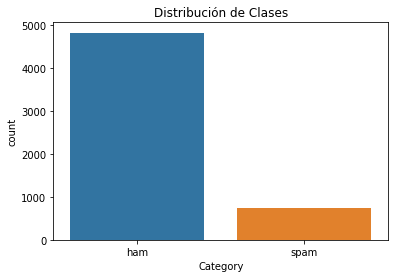

In [26]:
# Distribución de clases
sns.countplot(data['Category'])
plt.title('Distribución de Clases')
plt.show()

## Preprocesamiento de Datos

El preprocesamiento de texto es una parte importante en un proyecto de NLP. Aquí, convertí los textos en minúsculas, eliminé la puntuación y las stopwords.


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Definir función de limpieza
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Aplicar preprocesamiento a los datos
data['Processed_Text'] = data['Message'].apply(preprocess_text)

# Mostrar las primeras filas después del preprocesamiento
data.head()

,Category,Message,Processed_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


## Análisis de Características

Realicé un análisis para entender mejor las características de los datos, como la longitud de los mensajes.

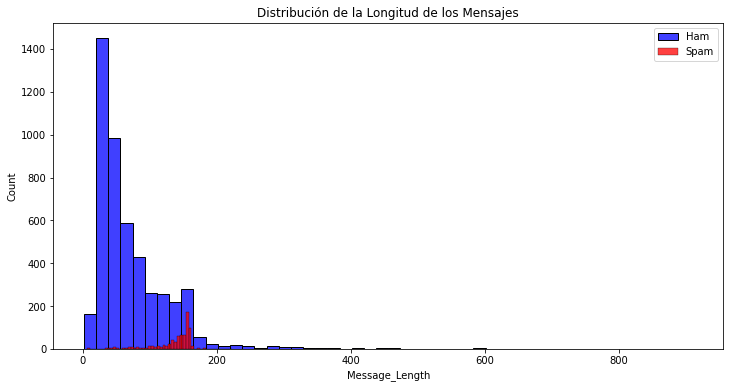

In [9]:
# Longitud de los mensajes
data['Message_Length'] = data['Message'].apply(len)

# Distribución de la longitud de los mensajes
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Category'] == 'ham']['Message_Length'], bins=50, color='blue', label='Ham')
sns.histplot(data[data['Category'] == 'spam']['Message_Length'], bins=50, color='red', label='Spam')
plt.legend()
plt.title('Distribución de la Longitud de los Mensajes')
plt.show()

## Análisis de Frecuencia de Palabras

Examinar las palabras más comunes en los correos electrónicos puede proporcionar información sobre las características distintivas de los correos de spam y ham.

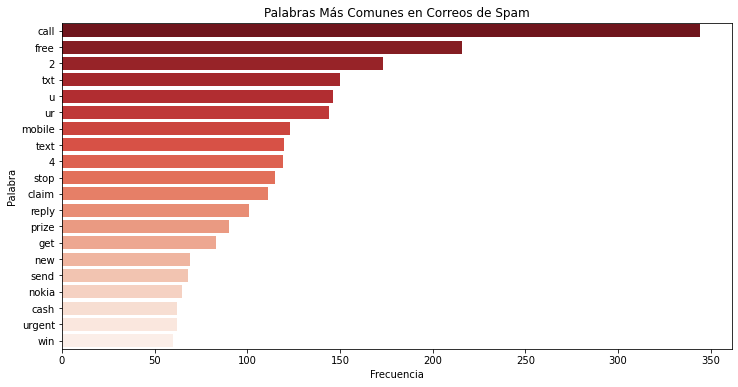

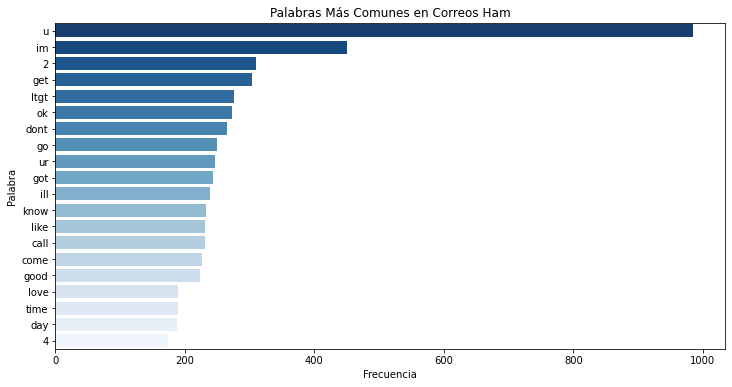

In [21]:
from collections import Counter
import seaborn as sns

# Obtener todas las palabras en los correos de spam
spam_words = ' '.join(list(data[data['Category'] == 'spam']['Processed_Text']))
spam_words = spam_words.split()

# Obtener todas las palabras en los correos ham
ham_words = ' '.join(list(data[data['Category'] == 'ham']['Processed_Text']))
ham_words = ham_words.split()

# Contar las palabras más comunes
spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

# Seleccionar las 20 palabras más comunes
spam_common_words = spam_word_counts.most_common(20)
ham_common_words = ham_word_counts.most_common(20)

# Convertir a DataFrame para mejor visualización
spam_df = pd.DataFrame(spam_common_words, columns=['Palabra', 'Frecuencia'])
ham_df = pd.DataFrame(ham_common_words, columns=['Palabra', 'Frecuencia'])

# Gráfica de barras para palabras más comunes en correos de spam
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=spam_df, palette='Reds_r')
plt.title('Palabras Más Comunes en Correos de Spam')
plt.show()

# Gráfica de barras para palabras más comunes en correos ham
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=ham_df, palette='Blues_r')
plt.title('Palabras Más Comunes en Correos Ham')
plt.show()

## Vectorización

Convertí los textos preprocesados en vectores numéricos utilizando TF-IDF, lo cual es esencial para que los modelos de aprendizaje automático puedan entender los datos de texto.



In [6]:
# Dividir el dataset en conjunto de train y test
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Text'], data['Category'], test_size=0.2, random_state=42)

# Vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Entrenamiento del Modelo

Entrené un modelo Naive Bayes, que es comúnmente utilizado para problemas de clasificación de texto debido a su simplicidad y eficacia.

In [7]:
# Entrenar el modelo
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_tfidf)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.968609865470852
Confusion Matrix:
 [[966   0]
 [ 35 114]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



## Análisis de Resultados y Conclusiones

El modelo Naive Bayes mostró una precisión del 96.86% en la clasificación de emails de spam. A continuación se presentan la matriz de confusión y el reporte de clasificación:

### Matriz de Confusión

La matriz de confusión se presenta a continuación:

- **True Positives (TP):** 966 (Correos legítimos correctamente clasificados como 'ham')
- **True Negatives (TN):** 114 (Correos de spam correctamente clasificados como 'spam')
- **False Positives (FP):** 0 (Correos legítimos incorrectamente clasificados como 'spam')
- **False Negatives (FN):** 35 (Correos de spam incorrectamente clasificados como 'ham')

### Reporte de Clasificación

El reporte de clasificación muestra las métricas de precisión, recall y f1-score para cada clase ('ham' y 'spam'):

- **Precisión:** La precisión para la clase 'ham' es del 97%, lo que significa que el 97% de los correos clasificados como 'ham' eran realmente legítimos. Para la clase 'spam', la precisión es del 100%, lo que indica que todos los correos clasificados como 'spam' eran realmente spam.
- **Recall:** El recall para la clase 'ham' es del 100%, indicando que el modelo identificó correctamente todos los correos legítimos. Sin embargo, para la clase 'spam', el recall es del 77%, lo que significa que el modelo identificó correctamente el 77% de los correos de spam.
- **F1-Score:** El f1-score, que es una métrica que combina precisión y recall, es del 98% para 'ham' y del 87% para 'spam'. Esto indica un buen balance entre precisión y recall para la clase 'ham', pero hay margen de mejora para la clase 'spam'.

### Conclusiones

El modelo Naive Bayes mostró un desempeño sólido en la clasificación de emails de spam, con una precisión general del 96.86%. Sin embargo, hay algunas áreas de mejora:

- **Recall para la clase 'spam':** El modelo tiene un recall más bajo para la clase 'spam' (77%), lo que significa que algunos correos de spam no están siendo identificados correctamente. Esto podría mejorarse ajustando los hiperparámetros del modelo o utilizando técnicas de balanceo de clases.
- **Ajuste de Hiperparámetros:** Probar diferentes valores de alfa para el modelo Naive Bayes podría ayudar a mejorar su desempeño.
- **Enriquecimiento del Dataset:** Incluir más datos de entrenamiento, especialmente ejemplos de spam, podría mejorar la capacidad del modelo para generalizar y detectar correos de spam.
- **Uso de Técnicas Avanzadas:** Implementar modelos más avanzados como SVM o redes neuronales y compararlos con el modelo Naive Bayes podría proporcionar mejores resultados.

### SVC

In [16]:
# Importar librerías adicionales necesarias
from sklearn.svm import SVC

In [17]:
# Entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Hacer predicciones
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy: 0.989237668161435
Confusion Matrix:
 [[965   1]
 [ 11 138]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



## Análisis de Resultados y Conclusiones

El modelo SVM mostró una precisión del 98.92% en la clasificación de emails de spam. A continuación se presentan la matriz de confusión y el reporte de clasificación:

### Matriz de Confusión

La matriz de confusión se presenta a continuación:


- **True Positives (TP):** 965 (Correos legítimos correctamente clasificados como 'ham')
- **True Negatives (TN):** 138 (Correos de spam correctamente clasificados como 'spam')
- **False Positives (FP):** 1 (Correos legítimos incorrectamente clasificados como 'spam')
- **False Negatives (FN):** 11 (Correos de spam incorrectamente clasificados como 'ham')

### Reporte de Clasificación

El reporte de clasificación muestra las métricas de precisión, recall y f1-score para cada clase ('ham' y 'spam'):

- **Precisión:** La precisión para la clase 'ham' es del 99%, lo que significa que el 99% de los correos clasificados como 'ham' eran realmente legítimos. Para la clase 'spam', la precisión también es del 99%, indicando que el modelo es muy preciso en identificar correos de spam.
- **Recall:** El recall para la clase 'ham' es del 100%, lo que indica que el modelo identificó correctamente todos los correos legítimos excepto uno. Para la clase 'spam', el recall es del 93%, lo que significa que el modelo identificó correctamente el 93% de los correos de spam.
- **F1-Score:** El f1-score, que es una métrica que combina precisión y recall, es del 99% para 'ham' y del 96% para 'spam'. Esto indica un excelente balance entre precisión y recall para ambas clases, con un desempeño ligeramente menor en la identificación de correos de spam en comparación con los legítimos.

### Conclusiones

El modelo SVM mostró un desempeño superior en la clasificación de emails de spam en comparación con el modelo Naive Bayes, con una precisión general del 98.92%. Las principales observaciones son:

- **Ventajas del SVM:**
  - El SVM puede manejar mejor los datos en espacios de alta dimensión, lo que se traduce en una mayor precisión y un f1-score más alto para ambas clases.
  - La capacidad del SVM para maximizar el margen de separación entre las clases permite una mejor generalización en problemas complejos como la clasificación de texto.

- **Desventajas del SVM:**
  - El entrenamiento del modelo SVM puede ser más lento y consumir más recursos computacionales en comparación con Naive Bayes.
  - Aunque el desempeño es excelente, el recall del 93% para la clase 'spam' indica que algunos correos de spam aún no están siendo identificados correctamente.

En resumen, el modelo SVM proporcionó un rendimiento notable en la tarea de clasificación de emails de spam, destacándose como una opción robusta y eficaz para este tipo de problemas.

### Observaciones finales

1. **Desbalance de Clases:**
   - La clase 'ham' tiene una cantidad significativamente mayor de ejemplos en comparación con la clase 'spam'.
   - Específicamente, hay aproximadamente cinco veces más ejemplos de 'ham' que de 'spam'.

2. **Implicaciones del Desbalance:**
   - **Modelos Sesgados:** Los algoritmos de aprendizaje automático pueden volverse sesgados hacia la clase mayoritaria ('ham'), ya que encuentran más ejemplos de esta clase durante el entrenamiento.
   - **Precisión Engañosa:** Una alta precisión global del modelo puede ser engañosa, ya que el modelo puede estar clasificando correctamente los correos 'ham' pero fallando en identificar correctamente los correos 'spam'.
   - **Métricas de Evaluación:** Es crucial utilizar métricas adicionales como el recall, precisión y f1-score, especialmente para la clase minoritaria ('spam'), para obtener una evaluación completa del desempeño del modelo.

### Soluciones Potenciales a futuro

Para mitigar el impacto del desbalance de clases, se pueden considerar las siguientes técnicas:

1. **Recolección de Más Datos de la Clase Minoritaria:** Aumentar el número de ejemplos de correos 'spam' en el dataset.
2. **Técnicas de Re-muestreo:**
   - **Submuestreo (Under-sampling):** Reducir el número de ejemplos de la clase mayoritaria ('ham') para equilibrar el dataset.
   - **Sobremuestreo (Over-sampling):** Aumentar el número de ejemplos de la clase minoritaria ('spam') mediante técnicas como el duplicado de datos o el uso de métodos como SMOTE (Synthetic Minority Over-sampling Technique).
3. **Asignación de Pesos:** Modificar el algoritmo de aprendizaje para que asigne más peso a la clase minoritaria durante el entrenamiento.
4. **Generación de Datos Sintéticos:** Crear datos sintéticos adicionales para la clase minoritaria utilizando técnicas avanzadas como GANs (Generative Adversarial Networks).
